# 데이터 전처리

In [186]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import koreanize_matplotlib

In [187]:
%%writefile sample.csv
x1,x2,x3,x4,x5
,a,0.1,철수,2022-11-24
,b,0.2,영희,
3,c,0.3,,2022-11-26
4,d,0.4,은희,2022-11-27
5,,0.5,지우,2022-11-28
6,f,0.6,이슬,2022-11-29

Overwriting sample.csv


In [188]:
df = pd.read_csv('sample.csv')
df

,x1,x2,x3,x4,x5
0,NaN,a,0.1,철수,2022-11-24
1,NaN,b,0.2,영희,NaN
2,3.0,c,0.3,NaN,2022-11-26
3,4.0,d,0.4,은희,2022-11-27
4,5.0,NaN,0.5,지우,2022-11-28
5,6.0,f,0.6,이슬,2022-11-29


In [189]:
df.isnull()

,x1,x2,x3,x4,x5
0,True,False,False,False,False
1,True,False,False,False,True
2,False,False,False,True,False
3,False,False,False,False,False
4,False,True,False,False,False
5,False,False,False,False,False


In [190]:
df.isnull().sum()

x1    2
x2    1
x3    0
x4    1
x5    1
dtype: int64

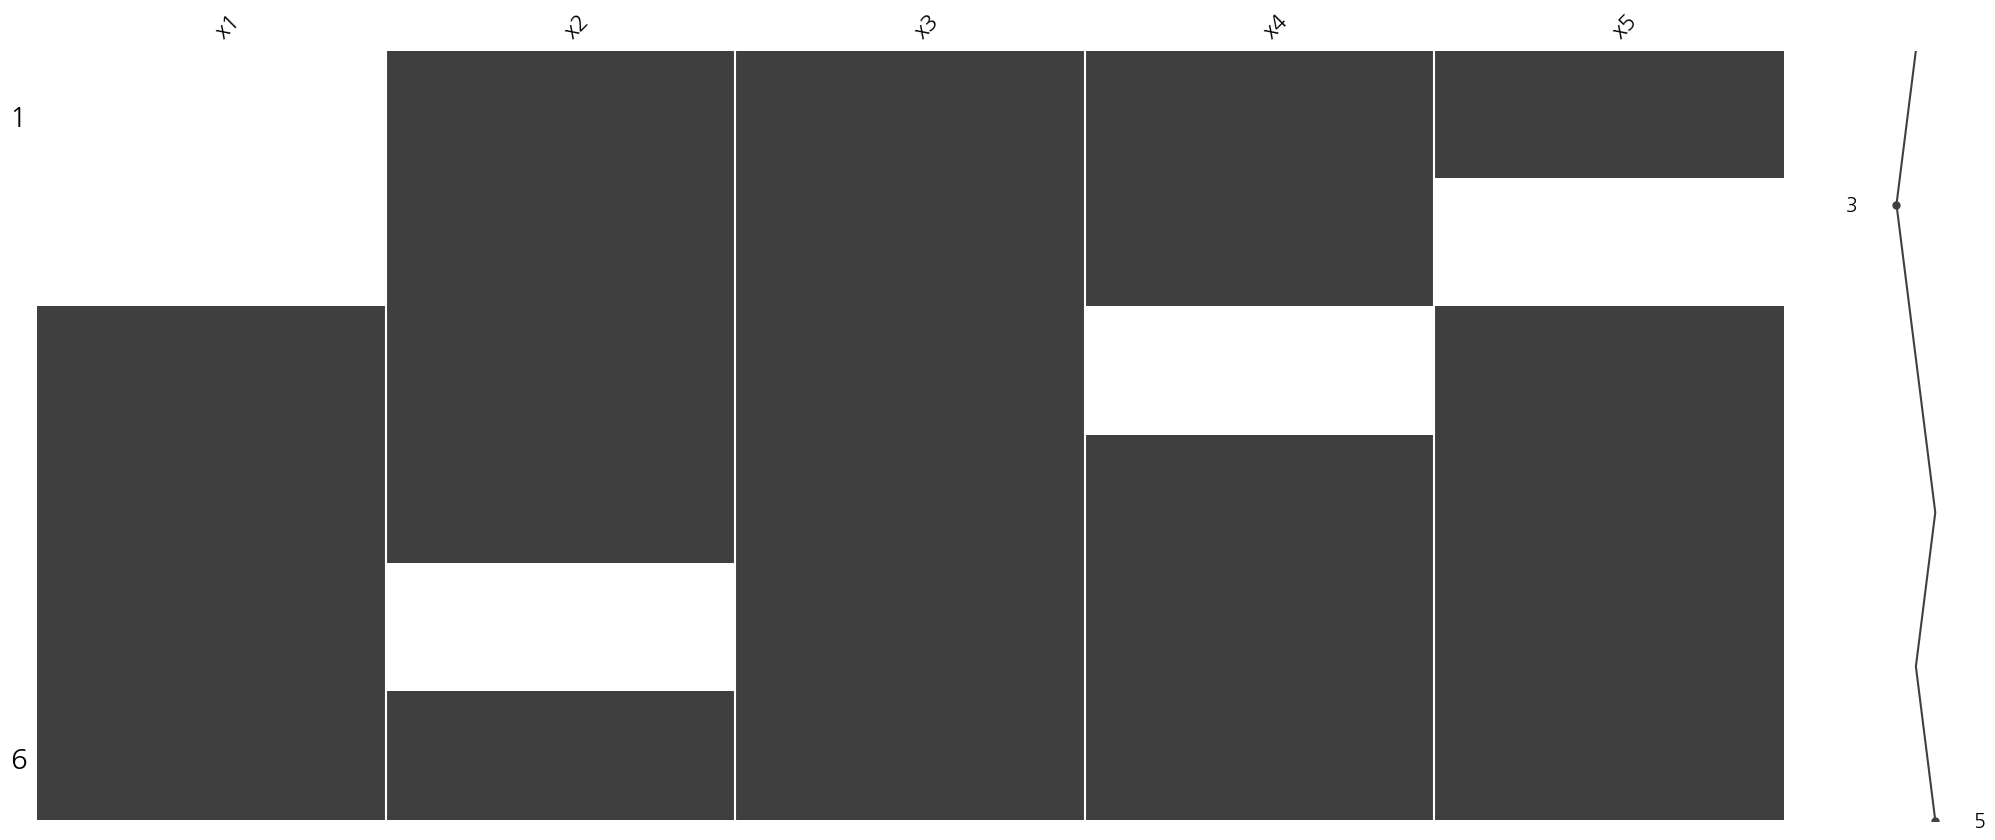

In [191]:
msno.matrix(df)
plt.show()

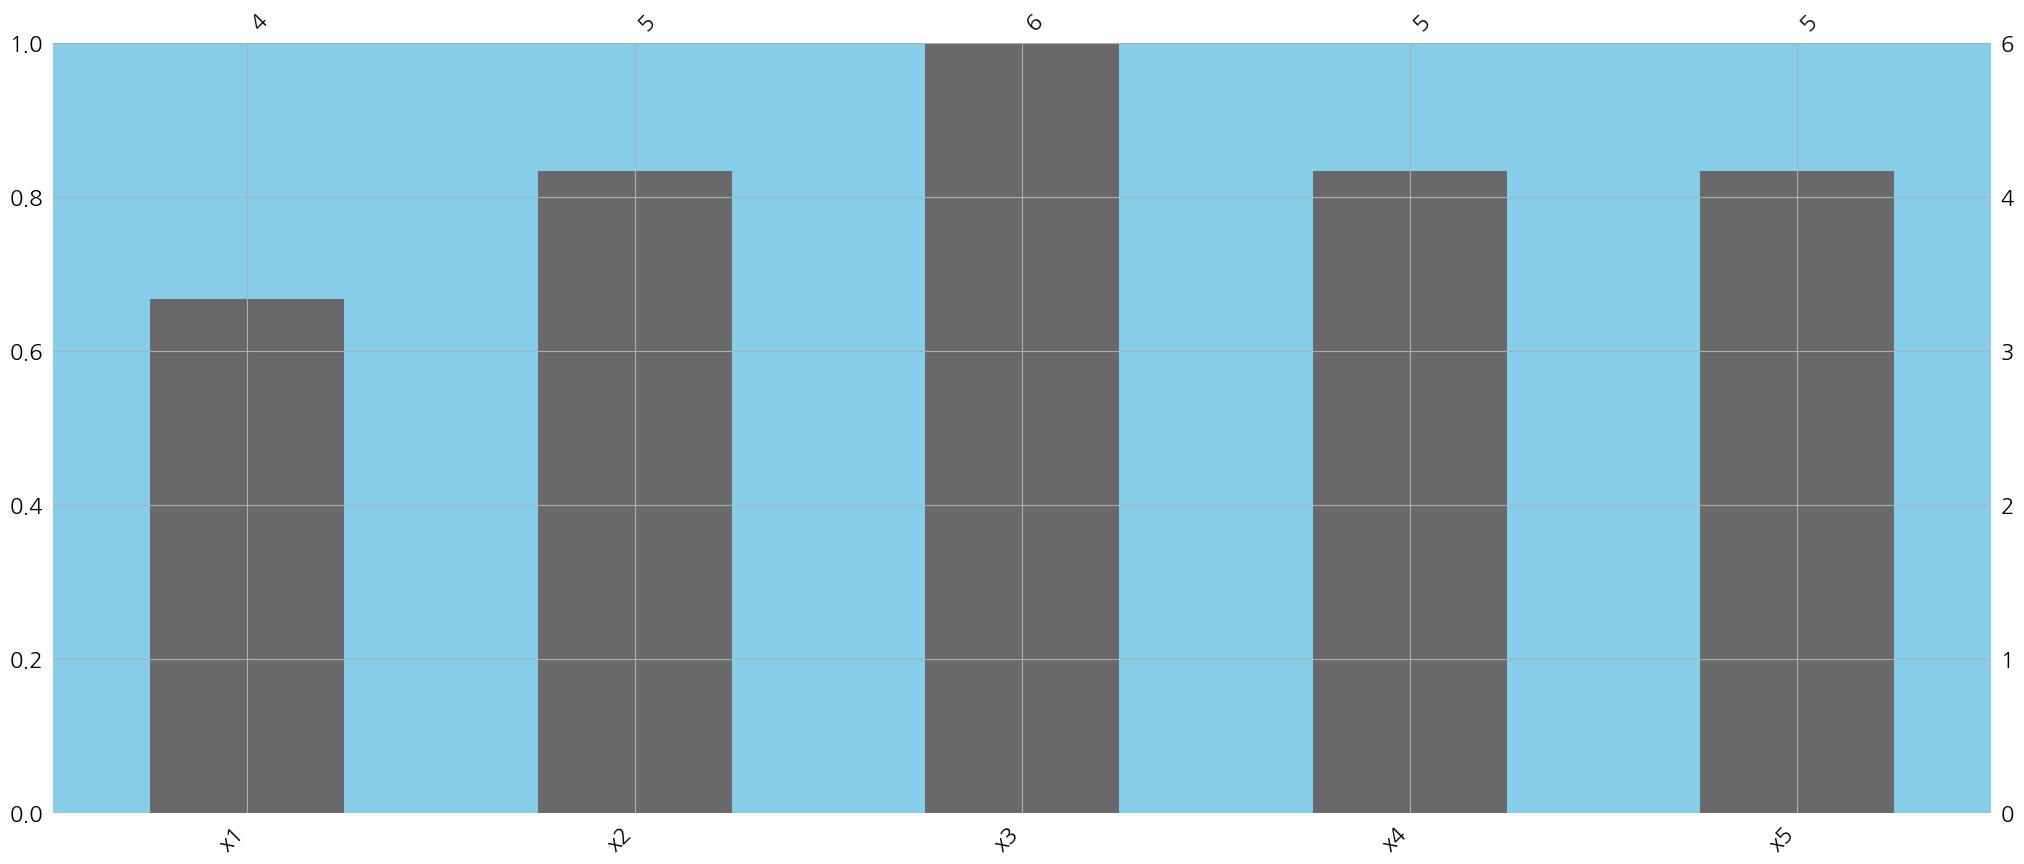

In [192]:
ax = msno.bar(df)
ax.patch.set_facecolor('skyblue')
ax.grid()
plt.show()

In [193]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


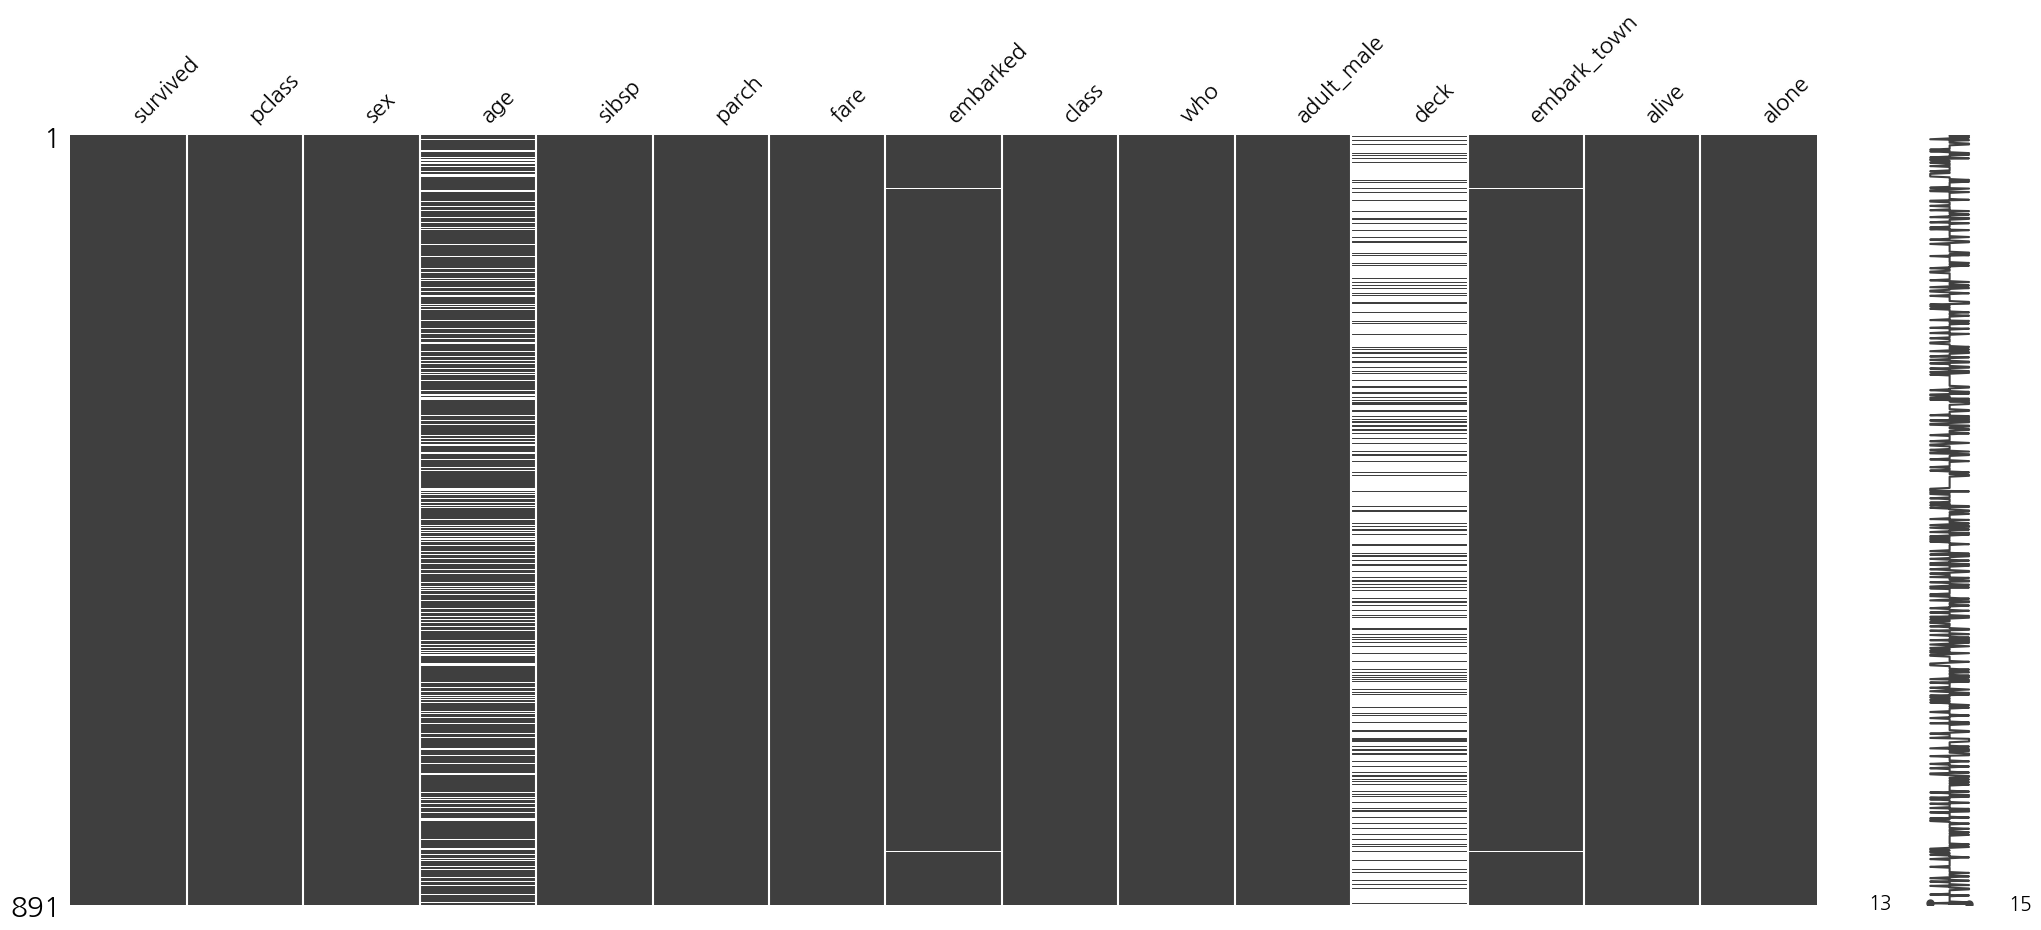

In [194]:
msno.matrix(titanic)
plt.show()

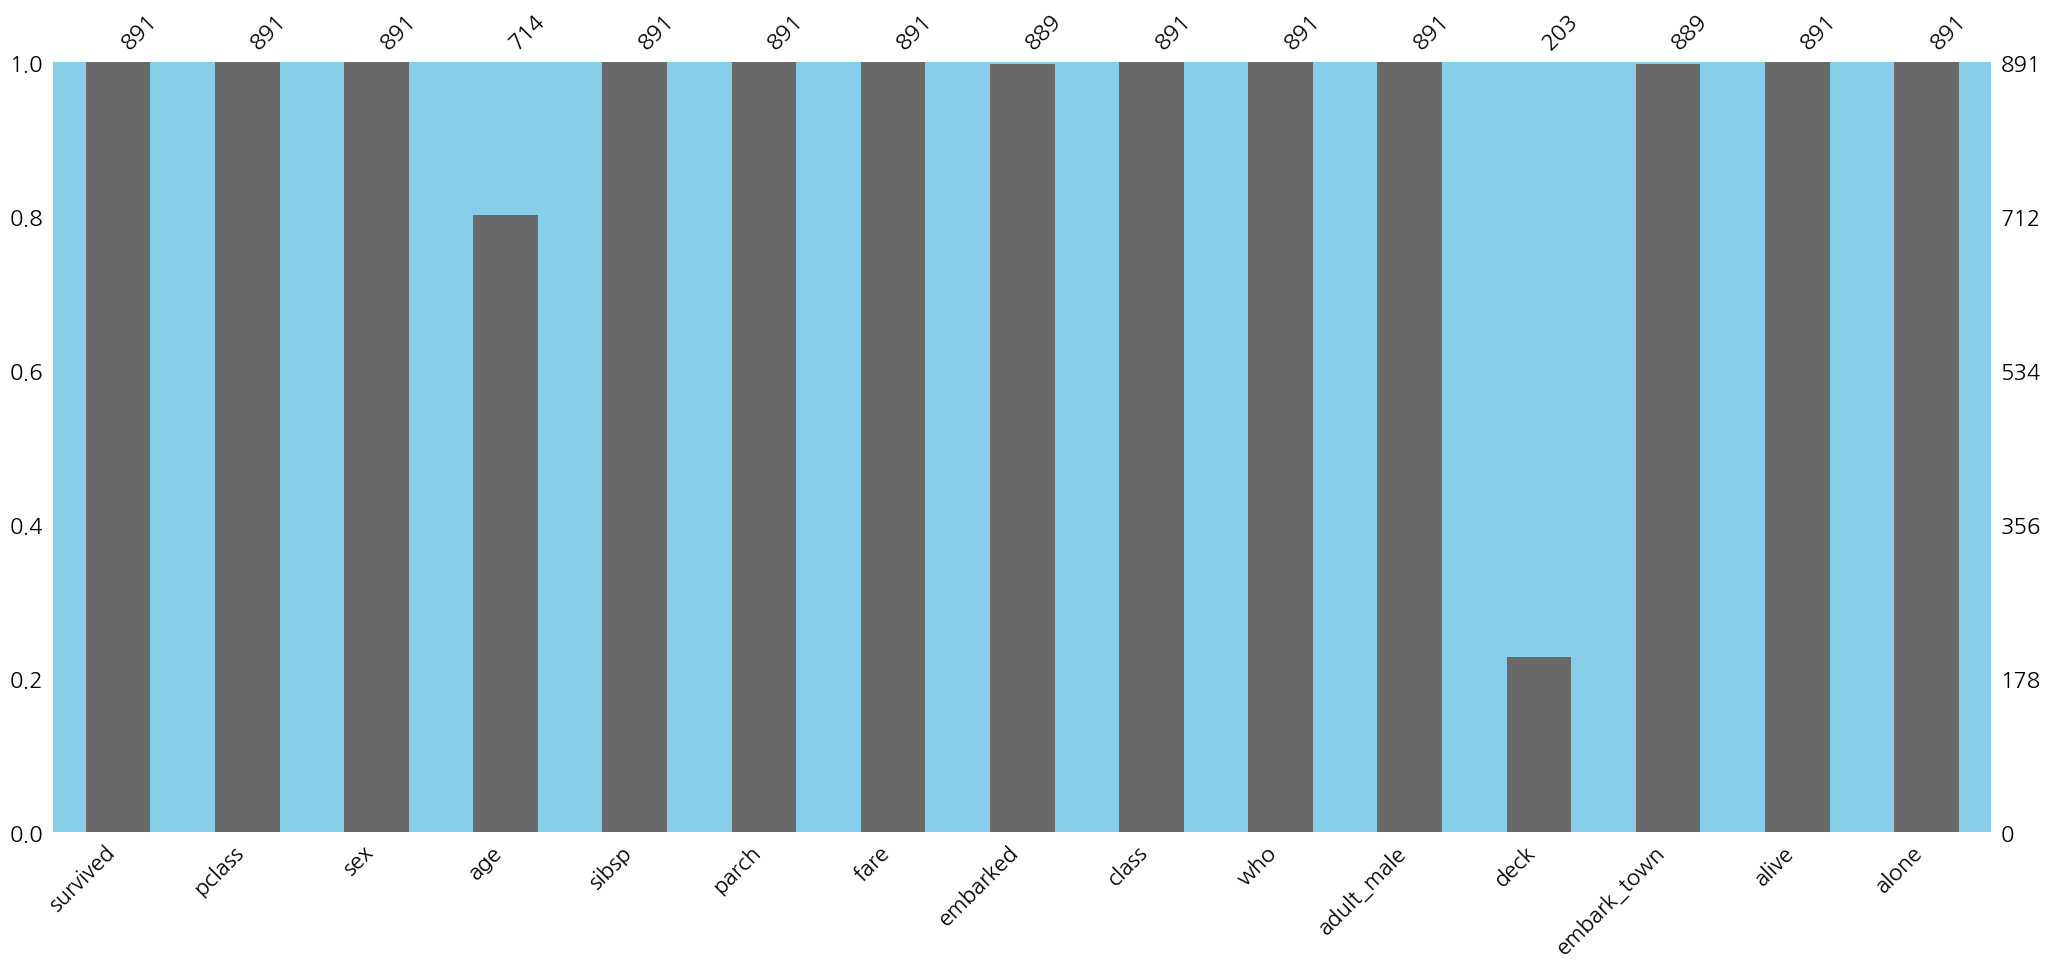

In [195]:
ax = msno.bar(titanic)
ax.patch.set_facecolor('skyblue')
plt.show()

In [196]:
df

,x1,x2,x3,x4,x5
0,NaN,a,0.1,철수,2022-11-24
1,NaN,b,0.2,영희,NaN
2,3.0,c,0.3,NaN,2022-11-26
3,4.0,d,0.4,은희,2022-11-27
4,5.0,NaN,0.5,지우,2022-11-28
5,6.0,f,0.6,이슬,2022-11-29


In [197]:
df.dropna()

,x1,x2,x3,x4,x5
3,4.0,d,0.4,은희,2022-11-27
5,6.0,f,0.6,이슬,2022-11-29


In [198]:
df.dropna(axis=1)

,x3
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5
5,0.6


In [199]:
# thresh사용법은
# 각 숫자 항목에서
# 최소 데이터가 thresh=#에서 #숫자 이하일때만 살려둠

# 아래 데이터를 보면 NaN이 없어 모든 데이터가 있는 3,5 번만 남아있음
df.dropna(thresh=5)

,x1,x2,x3,x4,x5
3,4.0,d,0.4,은희,2022-11-27
5,6.0,f,0.6,이슬,2022-11-29


In [200]:
df.dropna(thresh=4)

,x1,x2,x3,x4,x5
0,NaN,a,0.1,철수,2022-11-24
2,3.0,c,0.3,NaN,2022-11-26
3,4.0,d,0.4,은희,2022-11-27
4,5.0,NaN,0.5,지우,2022-11-28
5,6.0,f,0.6,이슬,2022-11-29


In [201]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

titanic 자료에서 deck자료가 NaN이 너무 많아서 
데이터가 70%이상 있는것만 남김

In [202]:
len(titanic)

891

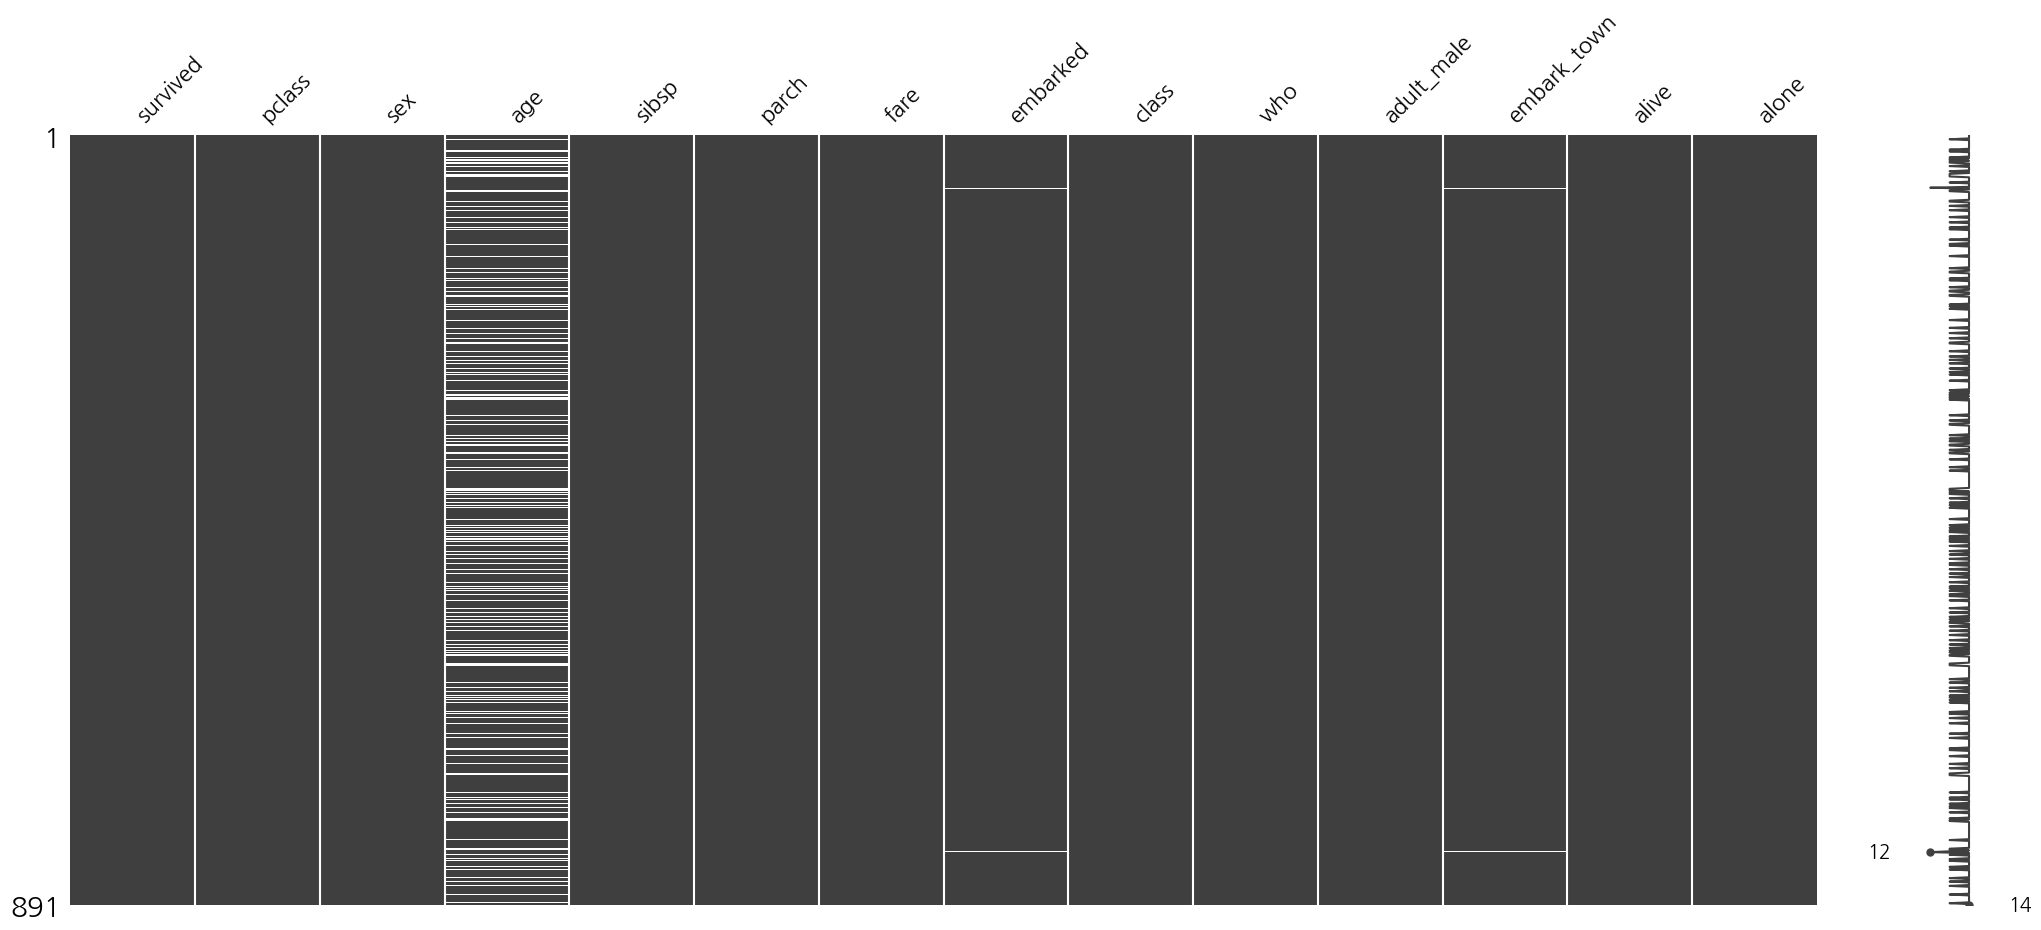

In [203]:
# 타이타닉 자료 중 50% NaN이 없는 경우만 지움
titanic = titanic.dropna(thresh=int(len(titanic)*0.5), axis=1)


msno.matrix(titanic)
plt.show()

위의 표를 보면 deck 자료는 사라짐(자료의 50% 이상이 NaN이여서)

이제 나머지 NaN을 처리해 주는 과정!


In [204]:
from sklearn.impute import SimpleImputer
'''
strategy 종류
mean : 평균
median : 중앙값
most_frequent : 최빈값
'''
imputer = SimpleImputer(strategy='most_frequent')

# 최빈값으로 NaN을 채워줌
# 근데 df의 경우 모든 데이터가 각각 다 다름으로 최빈값으로 NaN을 채우는건 좋지 않은 방법임!
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,x1,x2,x3,x4,x5
0,3.0,a,0.1,철수,2022-11-24
1,3.0,b,0.2,영희,2022-11-24
2,3.0,c,0.3,영희,2022-11-26
3,4.0,d,0.4,은희,2022-11-27
4,5.0,a,0.5,지우,2022-11-28
5,6.0,f,0.6,이슬,2022-11-29


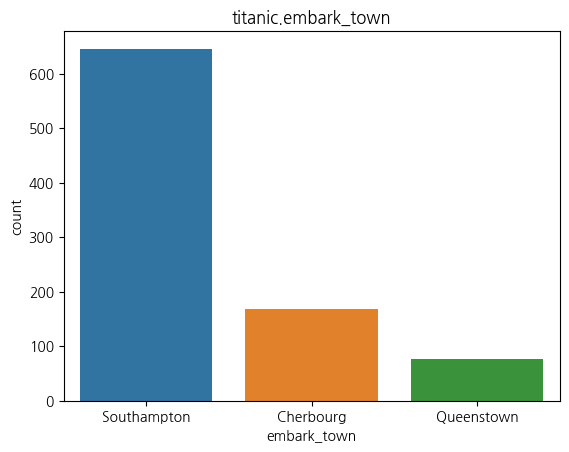

In [263]:
# sns.countplot 사용법!!!!
# x는 카운트할 항목이름
# data는 타이타닉 데이터 전체
sns.countplot(x=titanic['embark_town'],data=titanic)
plt.title('titanic.embark_town')
plt.show()

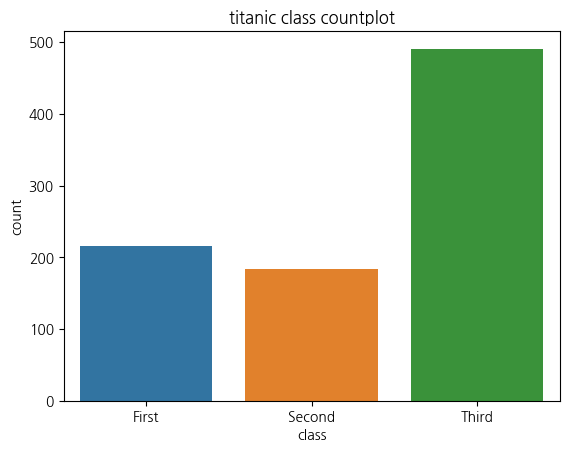

In [264]:
#sns.coutplot 한개더!
sns.countplot(x=titanic['class'], data=titanic)
plt.title('titanic class countplot')
plt.show()

In [255]:
titanic.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

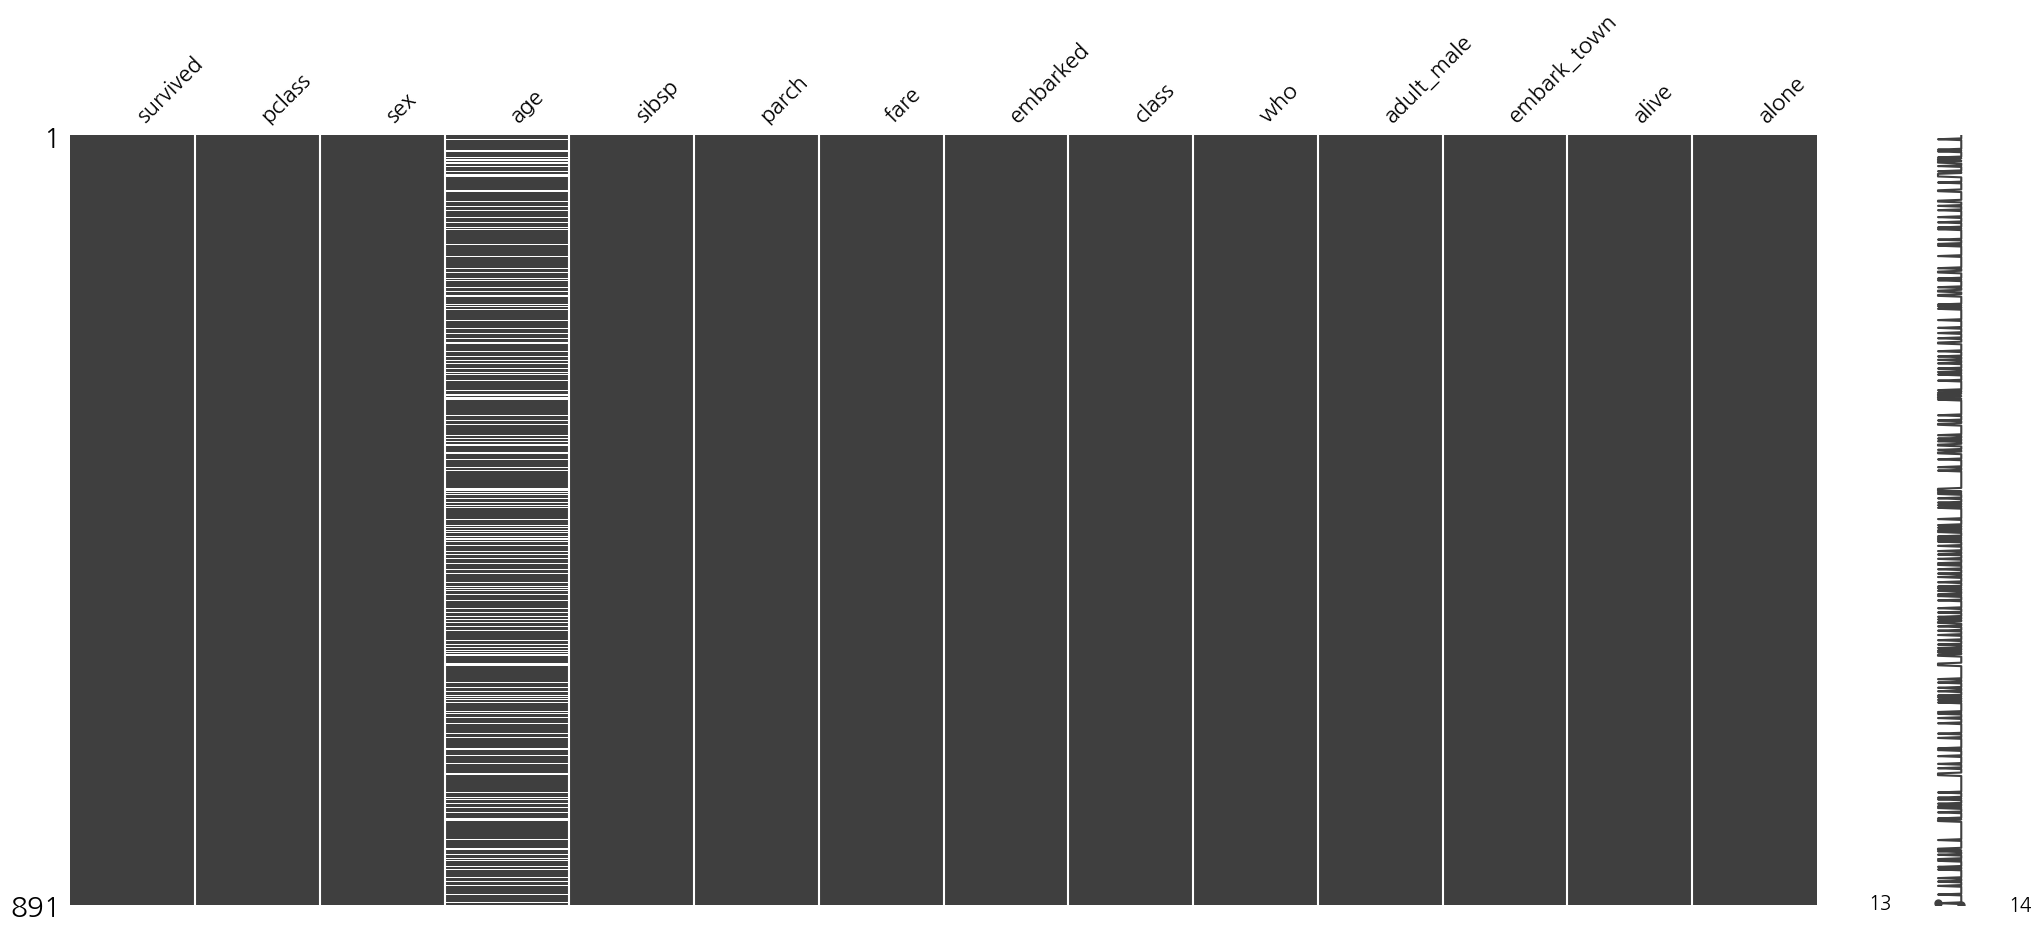

In [206]:
imputer_embark_town = SimpleImputer(strategy='most_frequent')
titanic['embark_town'] = imputer_embark_town.fit_transform(titanic[['embark_town']])
titanic['embarked'] = imputer_embark_town.fit_transform(titanic[['embarked']])

msno.matrix(titanic)
plt.show()

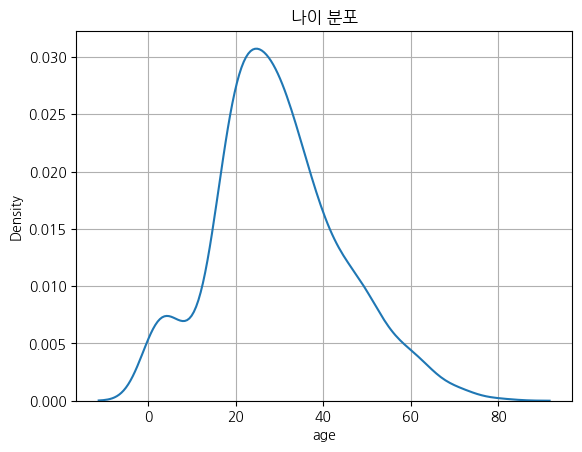

In [207]:
sns.kdeplot(titanic.age)
plt.title('나이 분포')
plt.grid()
plt.show()

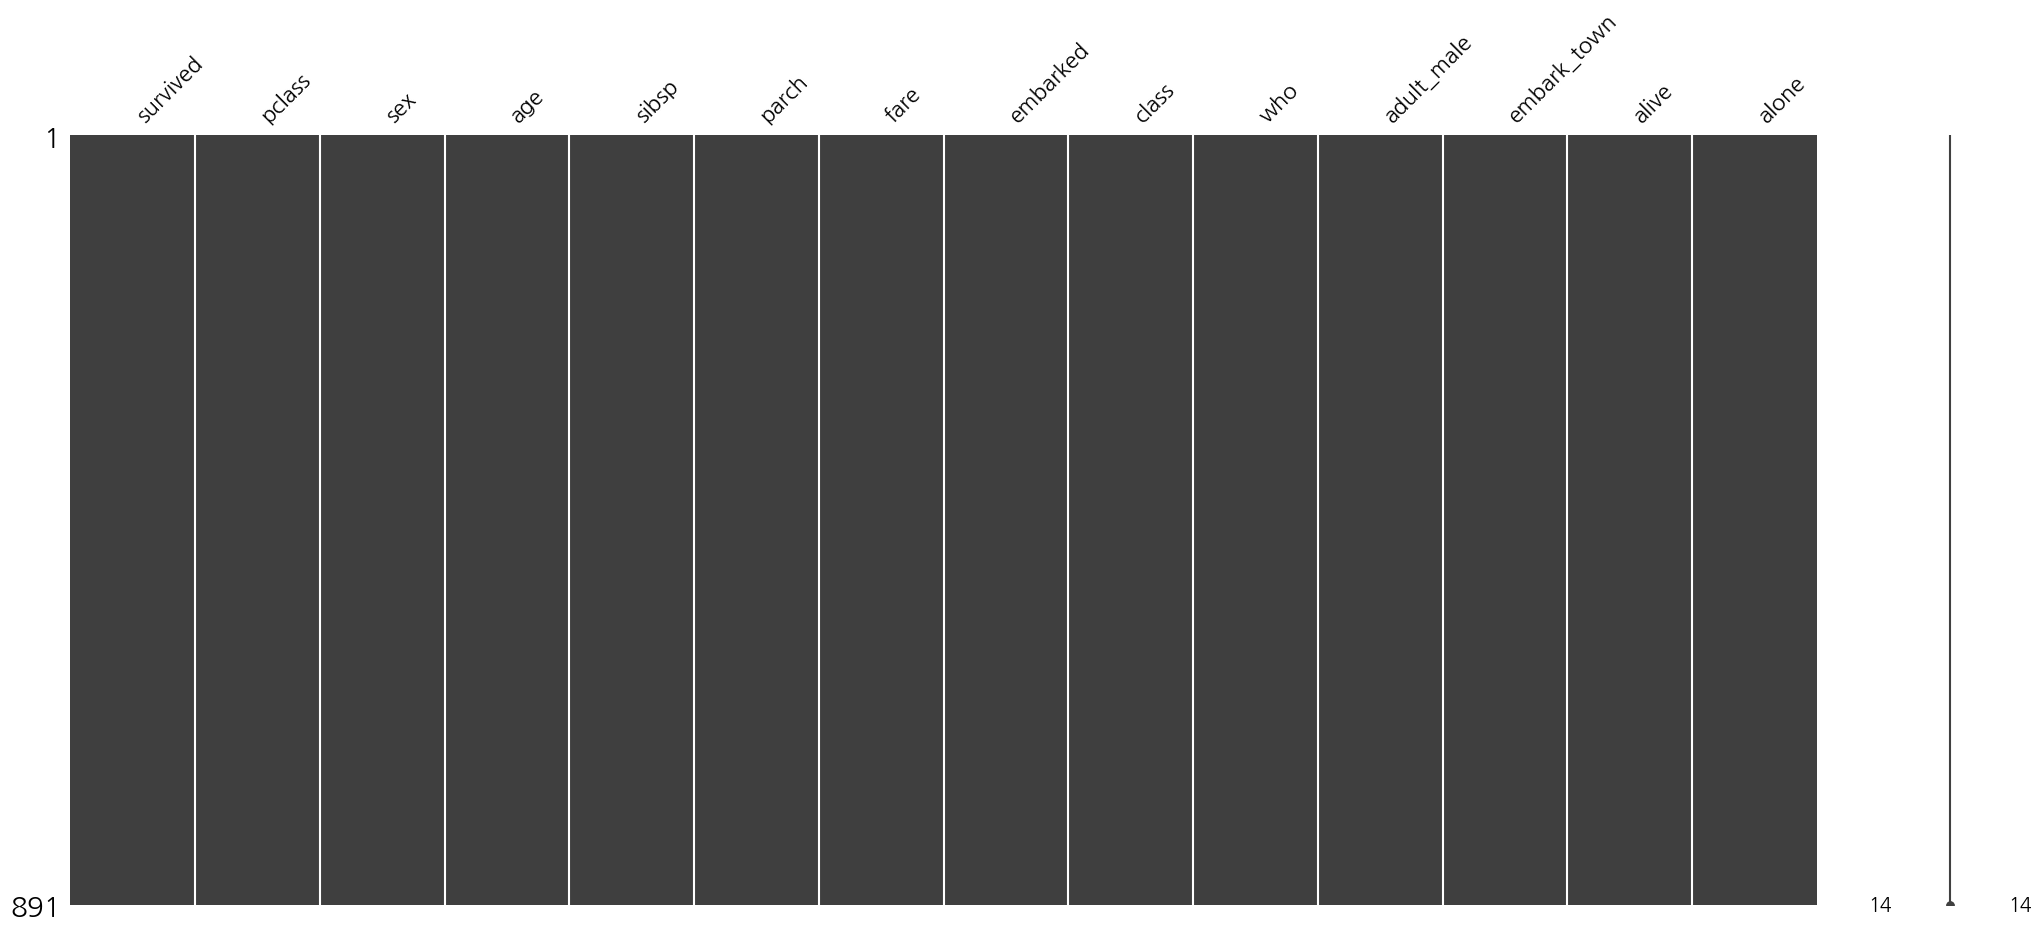

In [208]:
imputer_age = SimpleImputer(strategy='median')
titanic['age'] = imputer_age.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()

In [257]:
titanic['none_string'] = titanic['embark_town']

In [258]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,none_string
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Southampton


In [259]:
titanic['none_string'][40:50] = np.nan

C:\Users\tempe\AppData\Local\Temp\ipykernel_25108\3447329266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['none_string'][40:50] = np.nan


<AxesSubplot: >

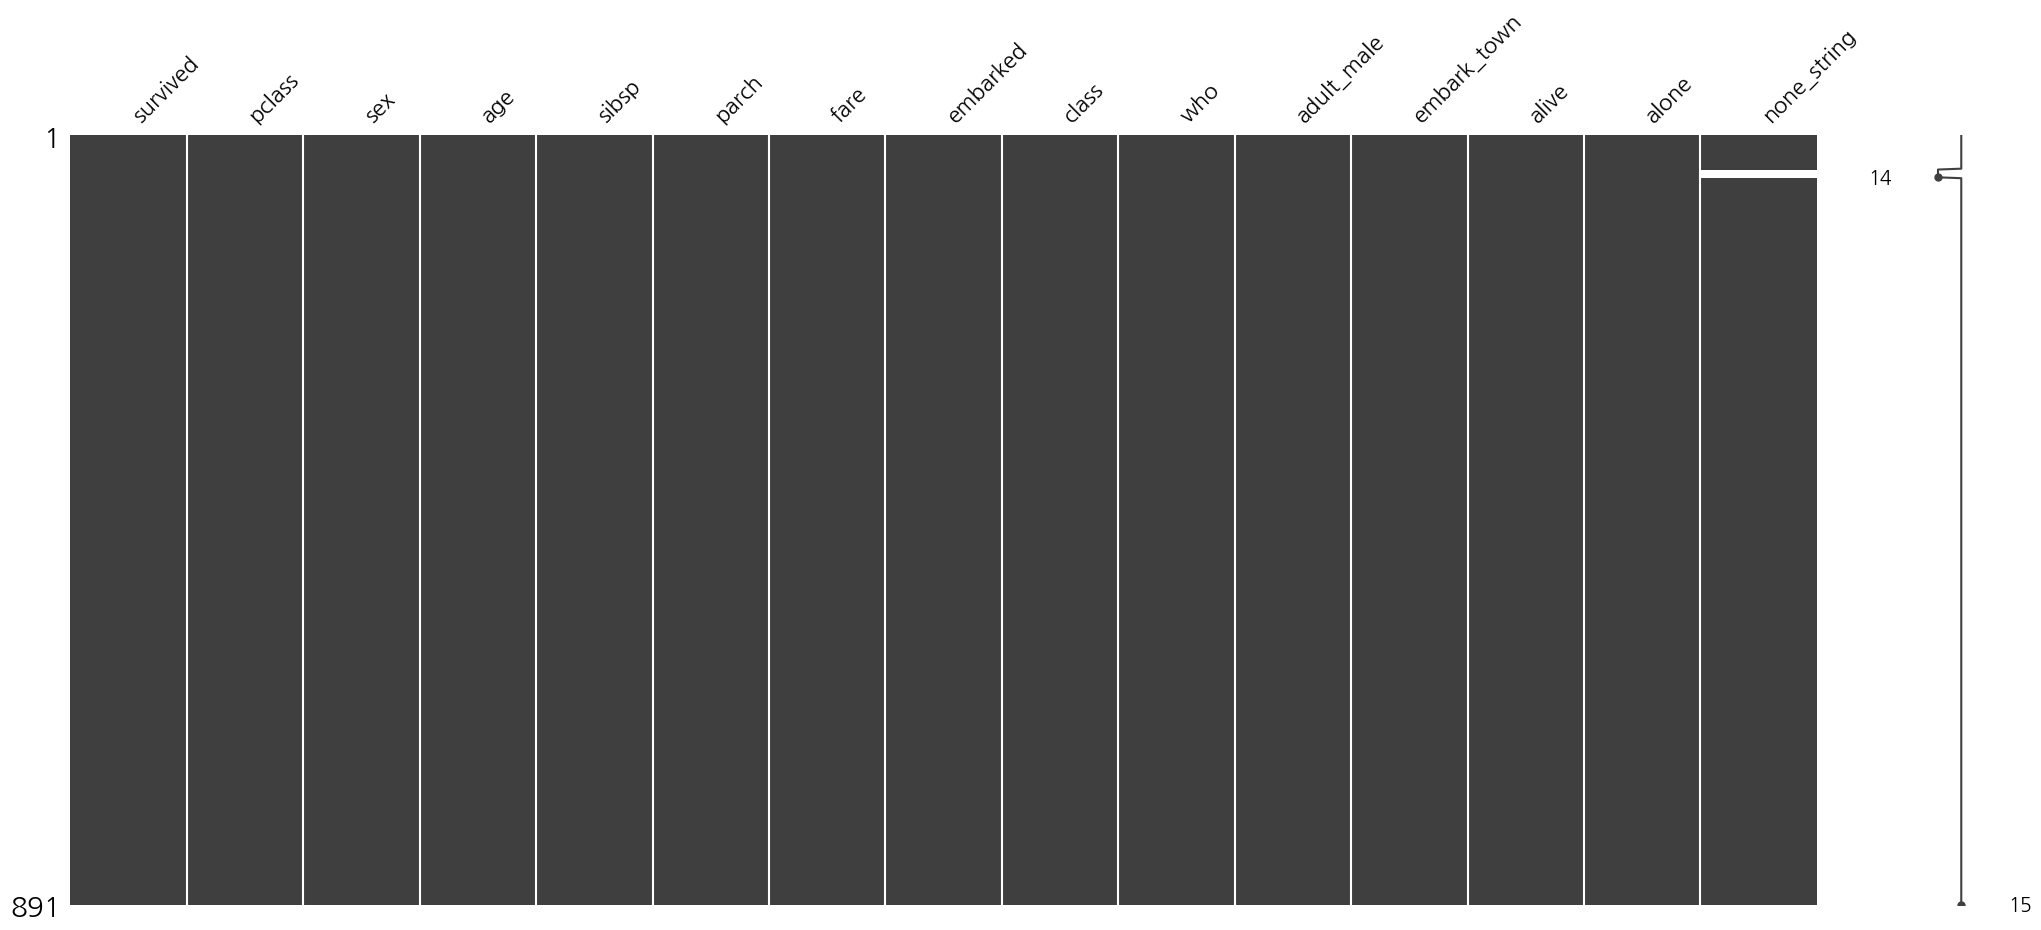

In [212]:
msno.matrix(titanic)

In [1]:
# 범주형 데이터의 경우 mean이나 median을 구할 수 없다.
# imputer_none_string = SimpleImputer(strategy='mean')
# titanic['none_string'] = imputer_none_string.fit_transform(titanic[['none_string']])